In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud 

In [7]:
df = pd.read_csv(r"C:\Users\krupa\OneDrive\Desktop\practice\dataset\layoffs_data.csv")
df

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
3637,Service,Los Angeles,Travel,NaN,2020-03-16,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31 15:17:26,United States,1.00,Unknown
3638,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,0.10,Unknown
3639,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,0.75,Unknown
3640,Tamara Mellon,Los Angeles,Retail,20.0,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,0.40,Unknown


In [8]:
df.columns 

Index(['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Date',
       'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country',
       'Percentage', 'List_of_Employees_Laid_Off'],
      dtype='object')

In [9]:
df.isnull().sum()

Company                          0
Location_HQ                      0
Industry                         0
Laid_Off_Count                1253
Date                             0
Source                           0
Funds_Raised                   390
Stage                            0
Date_Added                       0
Country                          0
Percentage                    1300
List_of_Employees_Laid_Off       0
dtype: int64

In [10]:
df['Laid_Off_Count'] = df['Laid_Off_Count'].fillna(df['Laid_Off_Count'].mean())
df['Laid_Off_Count']

0       150.000000
1       100.000000
2        30.000000
3        30.000000
4       257.926329
           ...    
3637    257.926329
3638      8.000000
3639      6.000000
3640     20.000000
3641     75.000000
Name: Laid_Off_Count, Length: 3642, dtype: float64

In [11]:
df['Funds_Raised'] = df['Funds_Raised'].fillna(df['Funds_Raised'].mean())
df['Funds_Raised']

0        691.0
1       2000.0
2        119.0
3        651.0
4        117.0
         ...  
3637       5.1
3638      45.0
3639       1.0
3640      90.0
3641      12.0
Name: Funds_Raised, Length: 3642, dtype: float64

In [12]:
df['Percentage'] = df['Percentage'].fillna(df['Percentage'].mean())
df['Percentage'] 

0       0.281216
1       0.200000
2       0.300000
3       0.100000
4       0.120000
          ...   
3637    1.000000
3638    0.100000
3639    0.750000
3640    0.400000
3641    0.281216
Name: Percentage, Length: 3642, dtype: float64

In [13]:
df['Percentage'] = df['Percentage'].fillna(df['Percentage'].median())
df['Percentage'] 

0       0.281216
1       0.200000
2       0.300000
3       0.100000
4       0.120000
          ...   
3637    1.000000
3638    0.100000
3639    0.750000
3640    0.400000
3641    0.281216
Name: Percentage, Length: 3642, dtype: float64

In [14]:
df.isnull().sum()

Company                       0
Location_HQ                   0
Industry                      0
Laid_Off_Count                0
Date                          0
Source                        0
Funds_Raised                  0
Stage                         0
Date_Added                    0
Country                       0
Percentage                    0
List_of_Employees_Laid_Off    0
dtype: int64

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3637    False
3638    False
3639    False
3640    False
3641    False
Length: 3642, dtype: bool

Funds raised by Comapny

In [16]:
countries = df['Company'].value_counts().head(10)
countries

Company
Google       12
Amazon       12
Rivian        8
Microsoft     7
Spotify       6
Swiggy        6
Uber          6
Convoy        6
Gopuff        6
Unity         6
Name: count, dtype: int64

C:\Users\krupa\AppData\Local\Temp\ipykernel_22100\432554264.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='Funds_Raised', data=filtered_df, order=countries, palette="viridis")


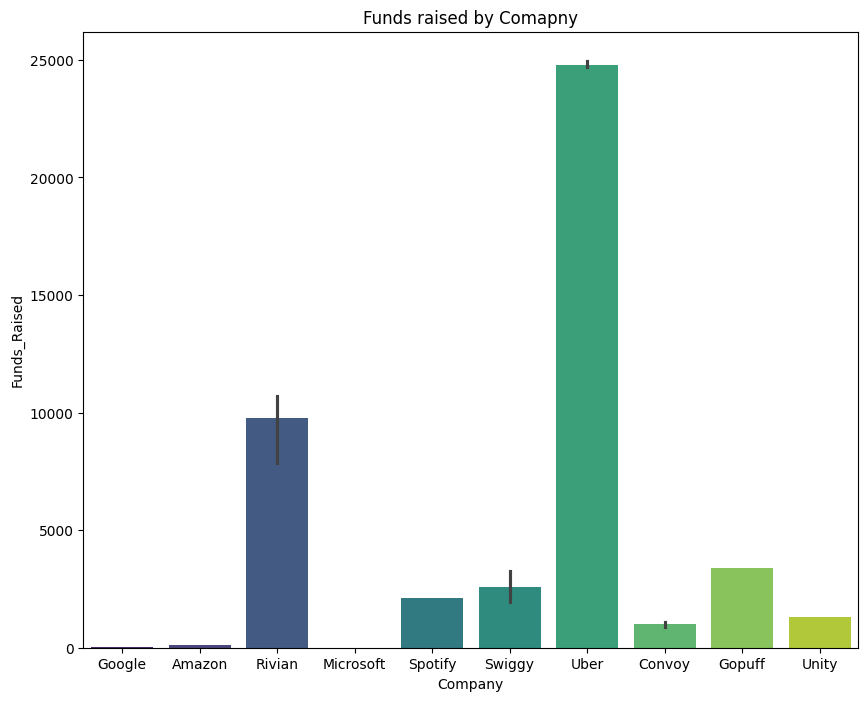

In [17]:
# funds raised by company 
countries = df['Company'].value_counts().head(10).index
filtered_df = df[df['Company'].isin(countries)]
plt.figure(figsize=(10, 8))
sns.barplot(x='Company', y='Funds_Raised', data=filtered_df, order=countries, palette="viridis")
plt.title('Funds raised by Comapny')
plt.show()

Industry funds raised 

In [18]:
industry = df['Industry'].value_counts().head(10)
industry

Industry
Finance           451
Retail            297
Healthcare        296
Transportation    226
Other             223
Food              213
Consumer          207
Marketing         178
Real Estate       151
Crypto            144
Name: count, dtype: int64

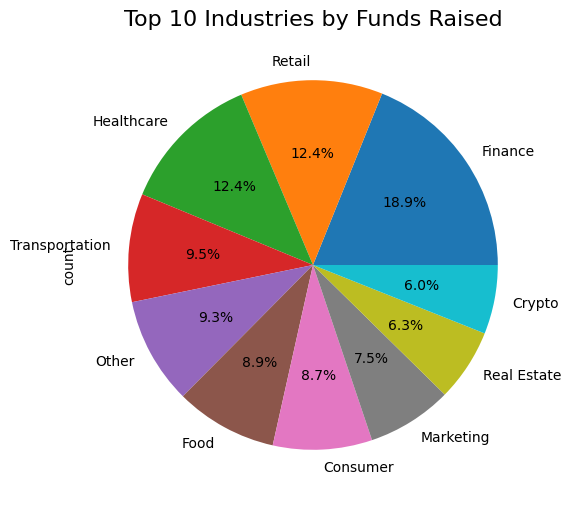

In [19]:
# Industry funds raised 
industry.plot(kind='pie', labels=industry.index, color=['skyblue','pink','red','blue','green','yellow'], figsize=(8, 6), autopct='%1.1f%%')
plt.title("Top 10 Industries by Funds Raised", fontsize=16)
plt.show()

Industry Low to High

In [20]:
df_sorting = df.groupby('Industry')['Laid_Off_Count']
df_sor = df_sorting.sum().sort_values().head(10)
df_final = df_sor.reset_index()
df_final

,Industry,Laid_Off_Count
0,Unknown,35.000000
1,AI,1551.631645
2,Legal,2513.557974
3,Aerospace,2735.557974
4,Product,6223.821264
5,Energy,6420.042277
6,Manufacturing,7189.557974
7,Construction,7216.042277
8,Recruiting,8454.042277
9,Logistics,10772.452909


C:\Users\krupa\AppData\Local\Temp\ipykernel_22100\779265933.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Industry", y="Laid_Off_Count", palette="viridis", data=df_final)


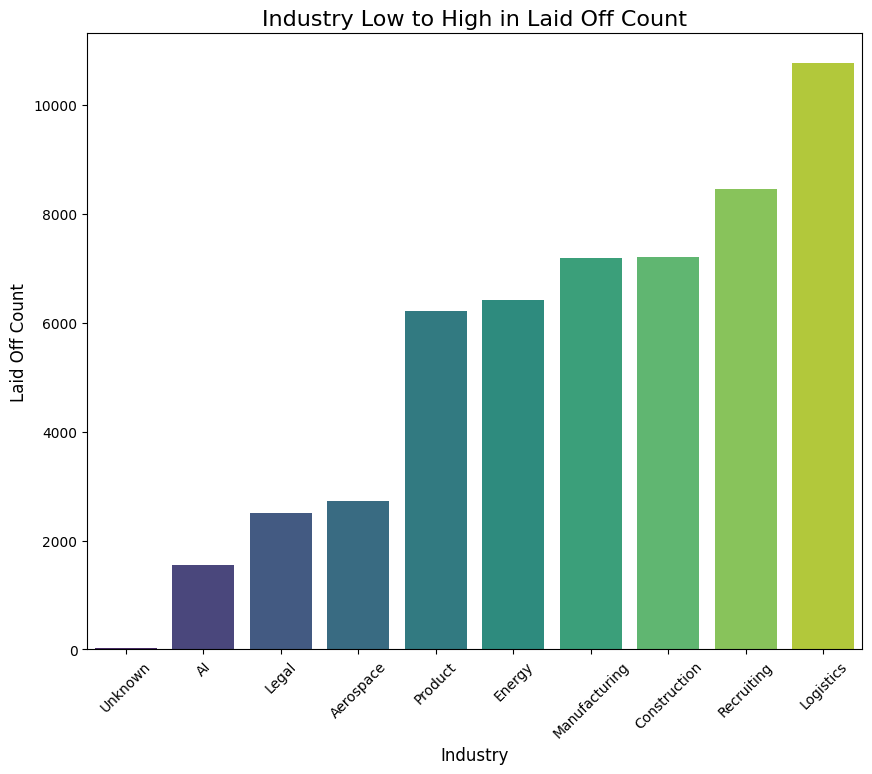

In [21]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Industry", y="Laid_Off_Count", palette="viridis", data=df_final)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Laid Off Count', fontsize=12)
plt.title('Industry Low to High in Laid Off Count', fontsize=16)
plt.xticks(rotation=45)  
plt.show()

Indutry High To Low count for Laid Off Count

In [22]:
df_sorting = df.groupby('Industry')['Laid_Off_Count']
df_sor = df_sorting.sum().sort_values(ascending=False).head(10)
df_final = df_sor.reset_index()
df_final

,Industry,Laid_Off_Count
0,Retail,94144.148598
1,Consumer,85987.769360
2,Finance,82049.875680
3,Other,81958.516953
4,Transportation,77729.769360
5,Food,64711.548347
6,Healthcare,64247.190875
7,Hardware,41618.894935
8,Real Estate,34841.506069
9,Travel,30353.937212


C:\Users\krupa\AppData\Local\Temp\ipykernel_22100\3933032601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Industry", y="Laid_Off_Count", palette="viridis", data=df_final)


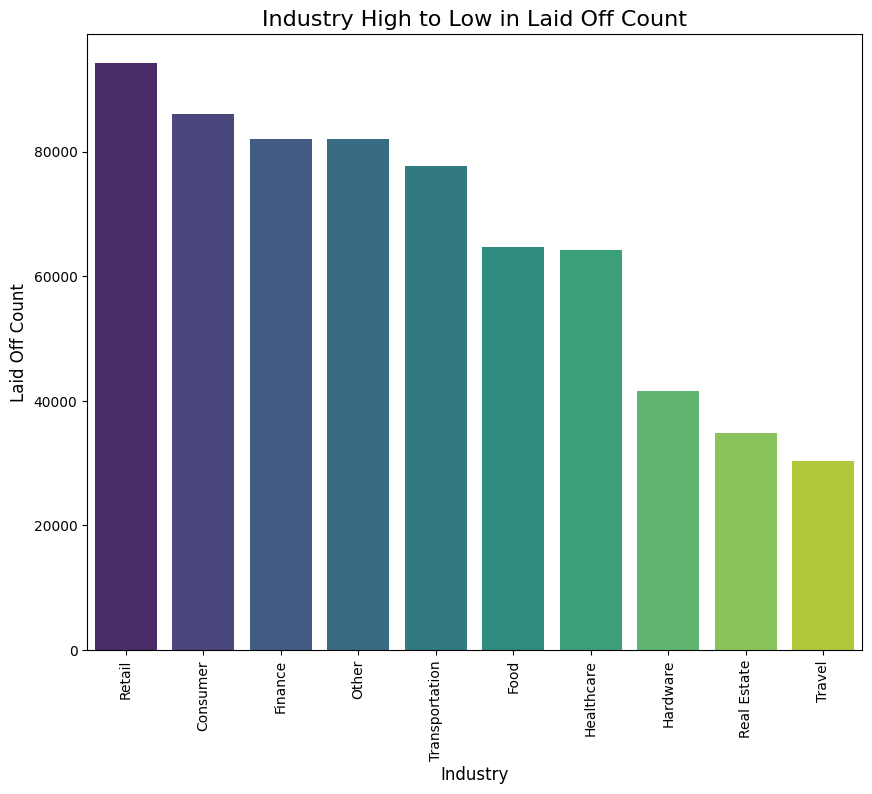

In [23]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Industry", y="Laid_Off_Count", palette="viridis", data=df_final)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Laid Off Count', fontsize=12)
plt.title('Industry High to Low in Laid Off Count', fontsize=16)
plt.xticks(rotation=90)  
plt.show()

Industry Laid Off Count 

In [24]:
industry = df['Industry'].value_counts().head(10)
industry

Industry
Finance           451
Retail            297
Healthcare        296
Transportation    226
Other             223
Food              213
Consumer          207
Marketing         178
Real Estate       151
Crypto            144
Name: count, dtype: int64

C:\Users\krupa\AppData\Local\Temp\ipykernel_22100\1893017447.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Industry", y="Laid_Off_Count", palette="rainbow", data=df)


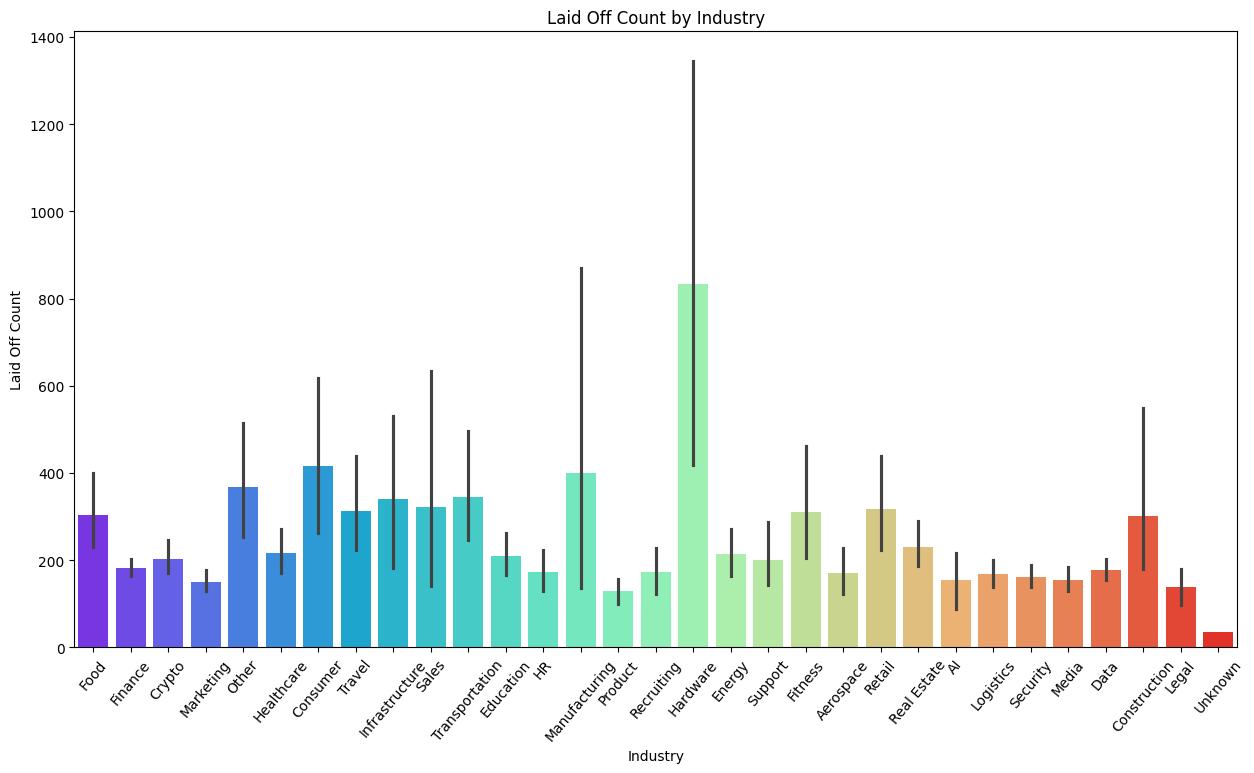

In [25]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Industry", y="Laid_Off_Count", palette="rainbow", data=df)
plt.xlabel('Industry')
plt.ylabel('Laid Off Count')
plt.title('Laid Off Count by Industry')
plt.xticks(rotation=50) 
plt.show()

Funds raised by industry 

In [26]:
industry = df['Industry'].value_counts().head(10)
industry

Industry
Finance           451
Retail            297
Healthcare        296
Transportation    226
Other             223
Food              213
Consumer          207
Marketing         178
Real Estate       151
Crypto            144
Name: count, dtype: int64

C:\Users\krupa\AppData\Local\Temp\ipykernel_22100\675481892.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Industry', y='Funds_Raised', data=filtered_df, order=industry, palette="viridis")


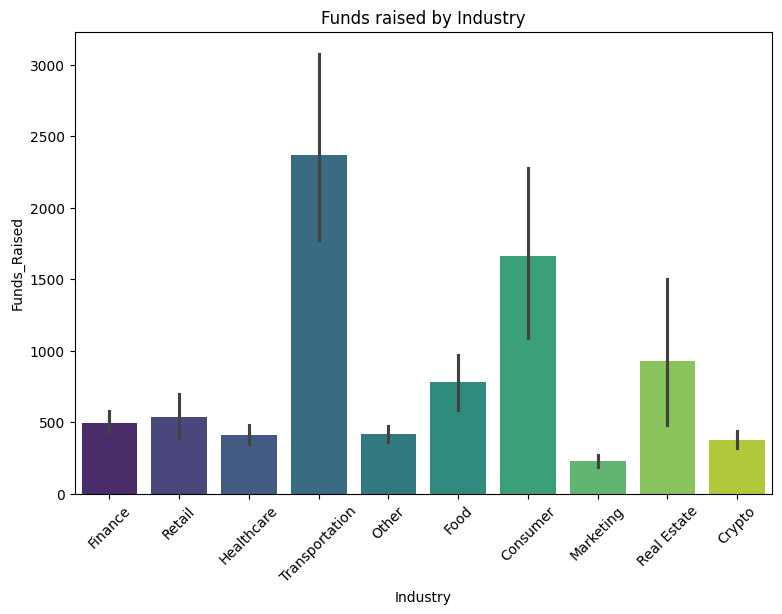

In [27]:
# funds raised by industry 
industry = df['Industry'].value_counts().head(10).index
filtered_df = df[df['Industry'].isin(industry)]
plt.figure(figsize=(9, 6))
sns.barplot(x='Industry', y='Funds_Raised', data=filtered_df, order=industry, palette="viridis")
plt.title('Funds raised by Industry')
plt.xticks(rotation=45)
plt.show()

Month wise Laid Off Count 

In [28]:
df['StartDate'] = pd.to_datetime(df["Date"])
df['StartDate'].dt.to_period('M')

0       2024-06
1       2024-06
2       2024-06
3       2024-06
4       2024-06
         ...   
3637    2020-03
3638    2020-03
3639    2020-03
3640    2020-03
3641    2020-03
Name: StartDate, Length: 3642, dtype: period[M]

In [29]:
df['Day'] = pd.to_datetime(df['StartDate']).dt.day

In [30]:
df['month'] = pd.to_datetime(df['StartDate']).dt.month_name()

In [31]:
monthly_laid_off = df.groupby('month')['Laid_Off_Count'].sum().reset_index()
monthly_laid_off.columns = ['Month', 'Total_Laid_Off_Count']
print("\n Month-wise Laid Off Count:")
print(monthly_laid_off)


 Month-wise Laid Off Count:
        Month  Total_Laid_Off_Count
0       April         105583.864797
1      August          55956.748849
2    December          41570.811637
3    February          84854.927585
4     January         170859.654667
5        July          60646.411888
6        June          70224.601507
7       March          83710.443282
8         May          85536.811637
9    November         100899.538719
10    October          47789.695689
11  September          31734.179992


C:\Users\krupa\AppData\Local\Temp\ipykernel_22100\1265080375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_laid_off, x='Month', y='Total_Laid_Off_Count', palette='viridis')


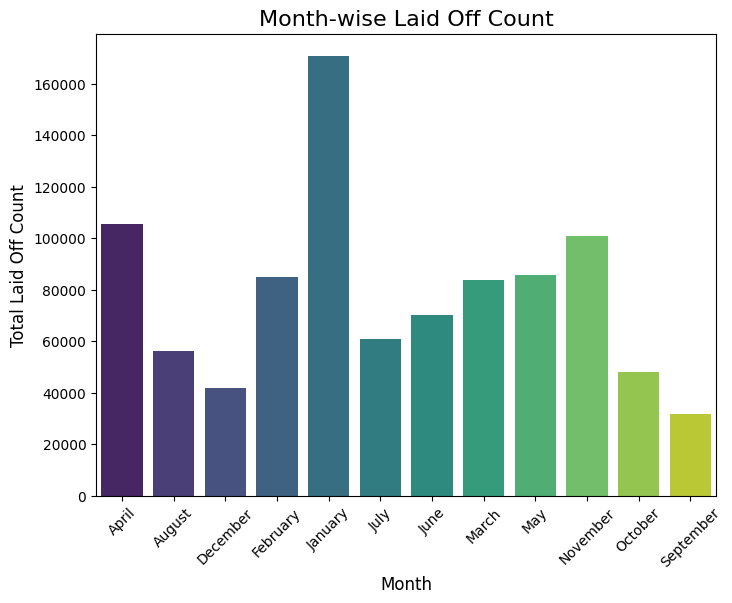

In [32]:
plt.figure(figsize=(8, 6))
sns.barplot(data=monthly_laid_off, x='Month', y='Total_Laid_Off_Count', palette='viridis')
plt.title("Month-wise Laid Off Count", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Laid Off Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\krupa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


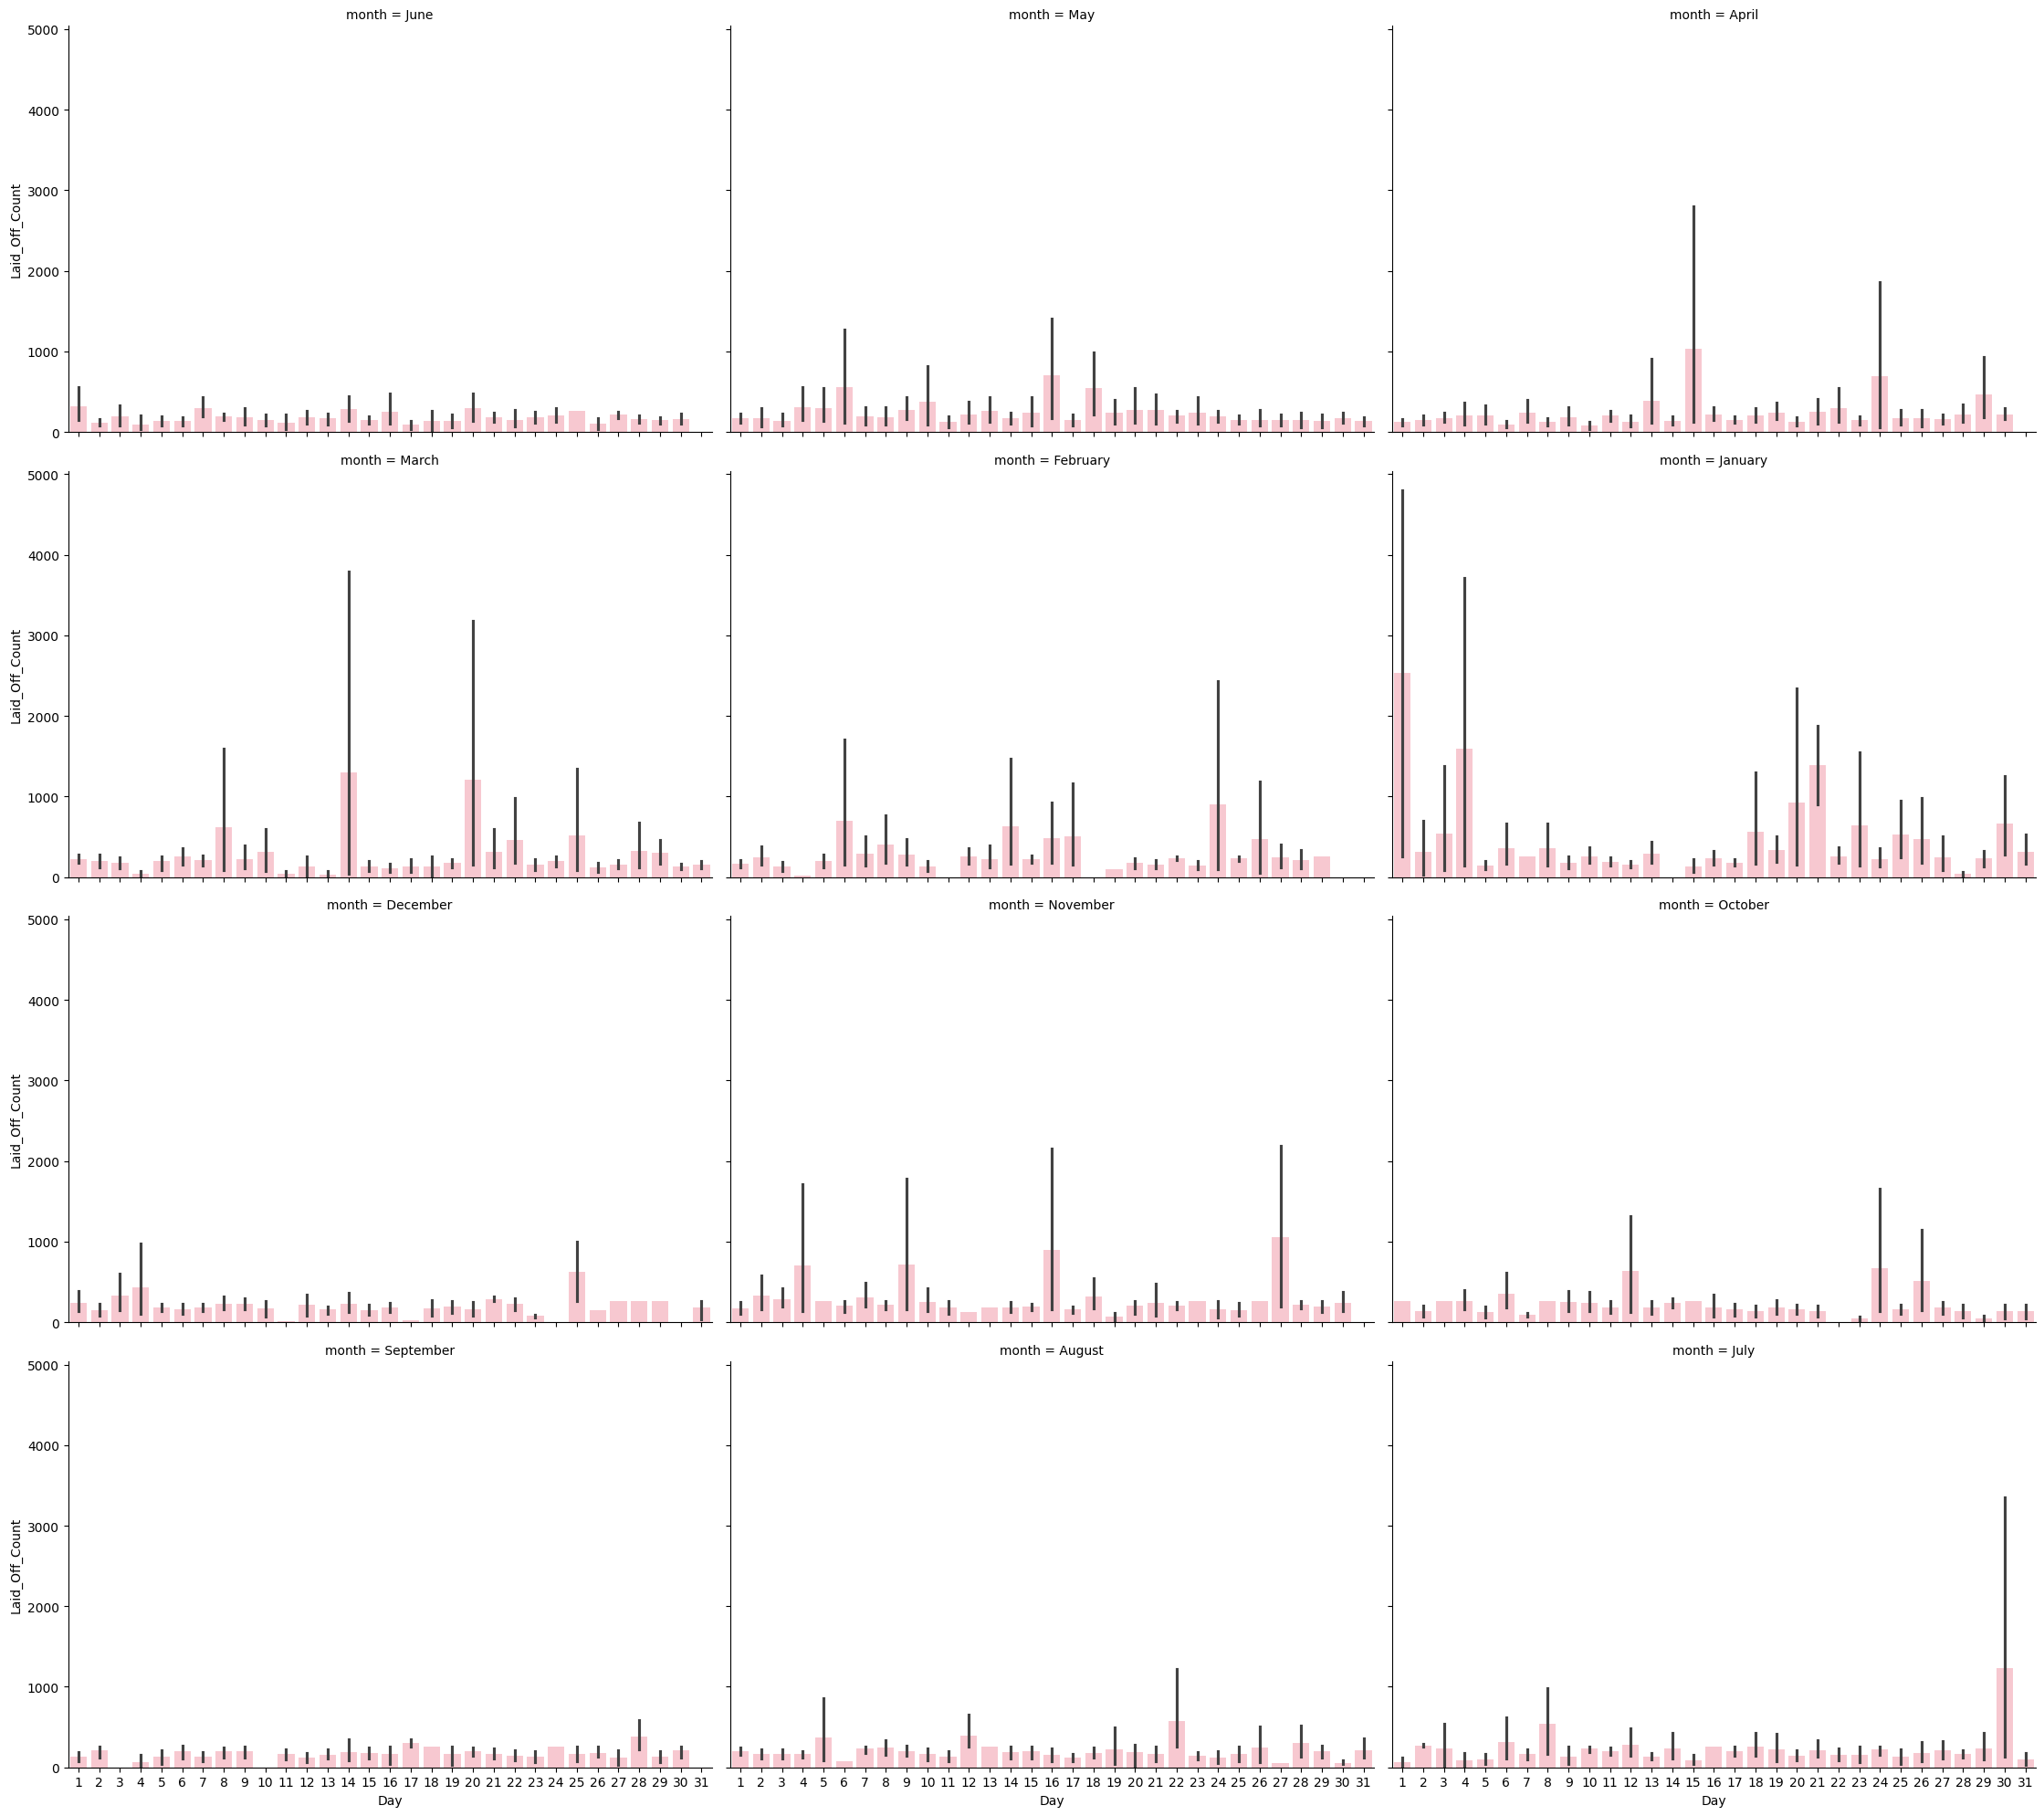

In [33]:
g = sns.FacetGrid(df, col="month", col_wrap=3, height=5, aspect=1.5)
g.map(sns.barplot, "Day", "Laid_Off_Count", color="pink")
plt.show()

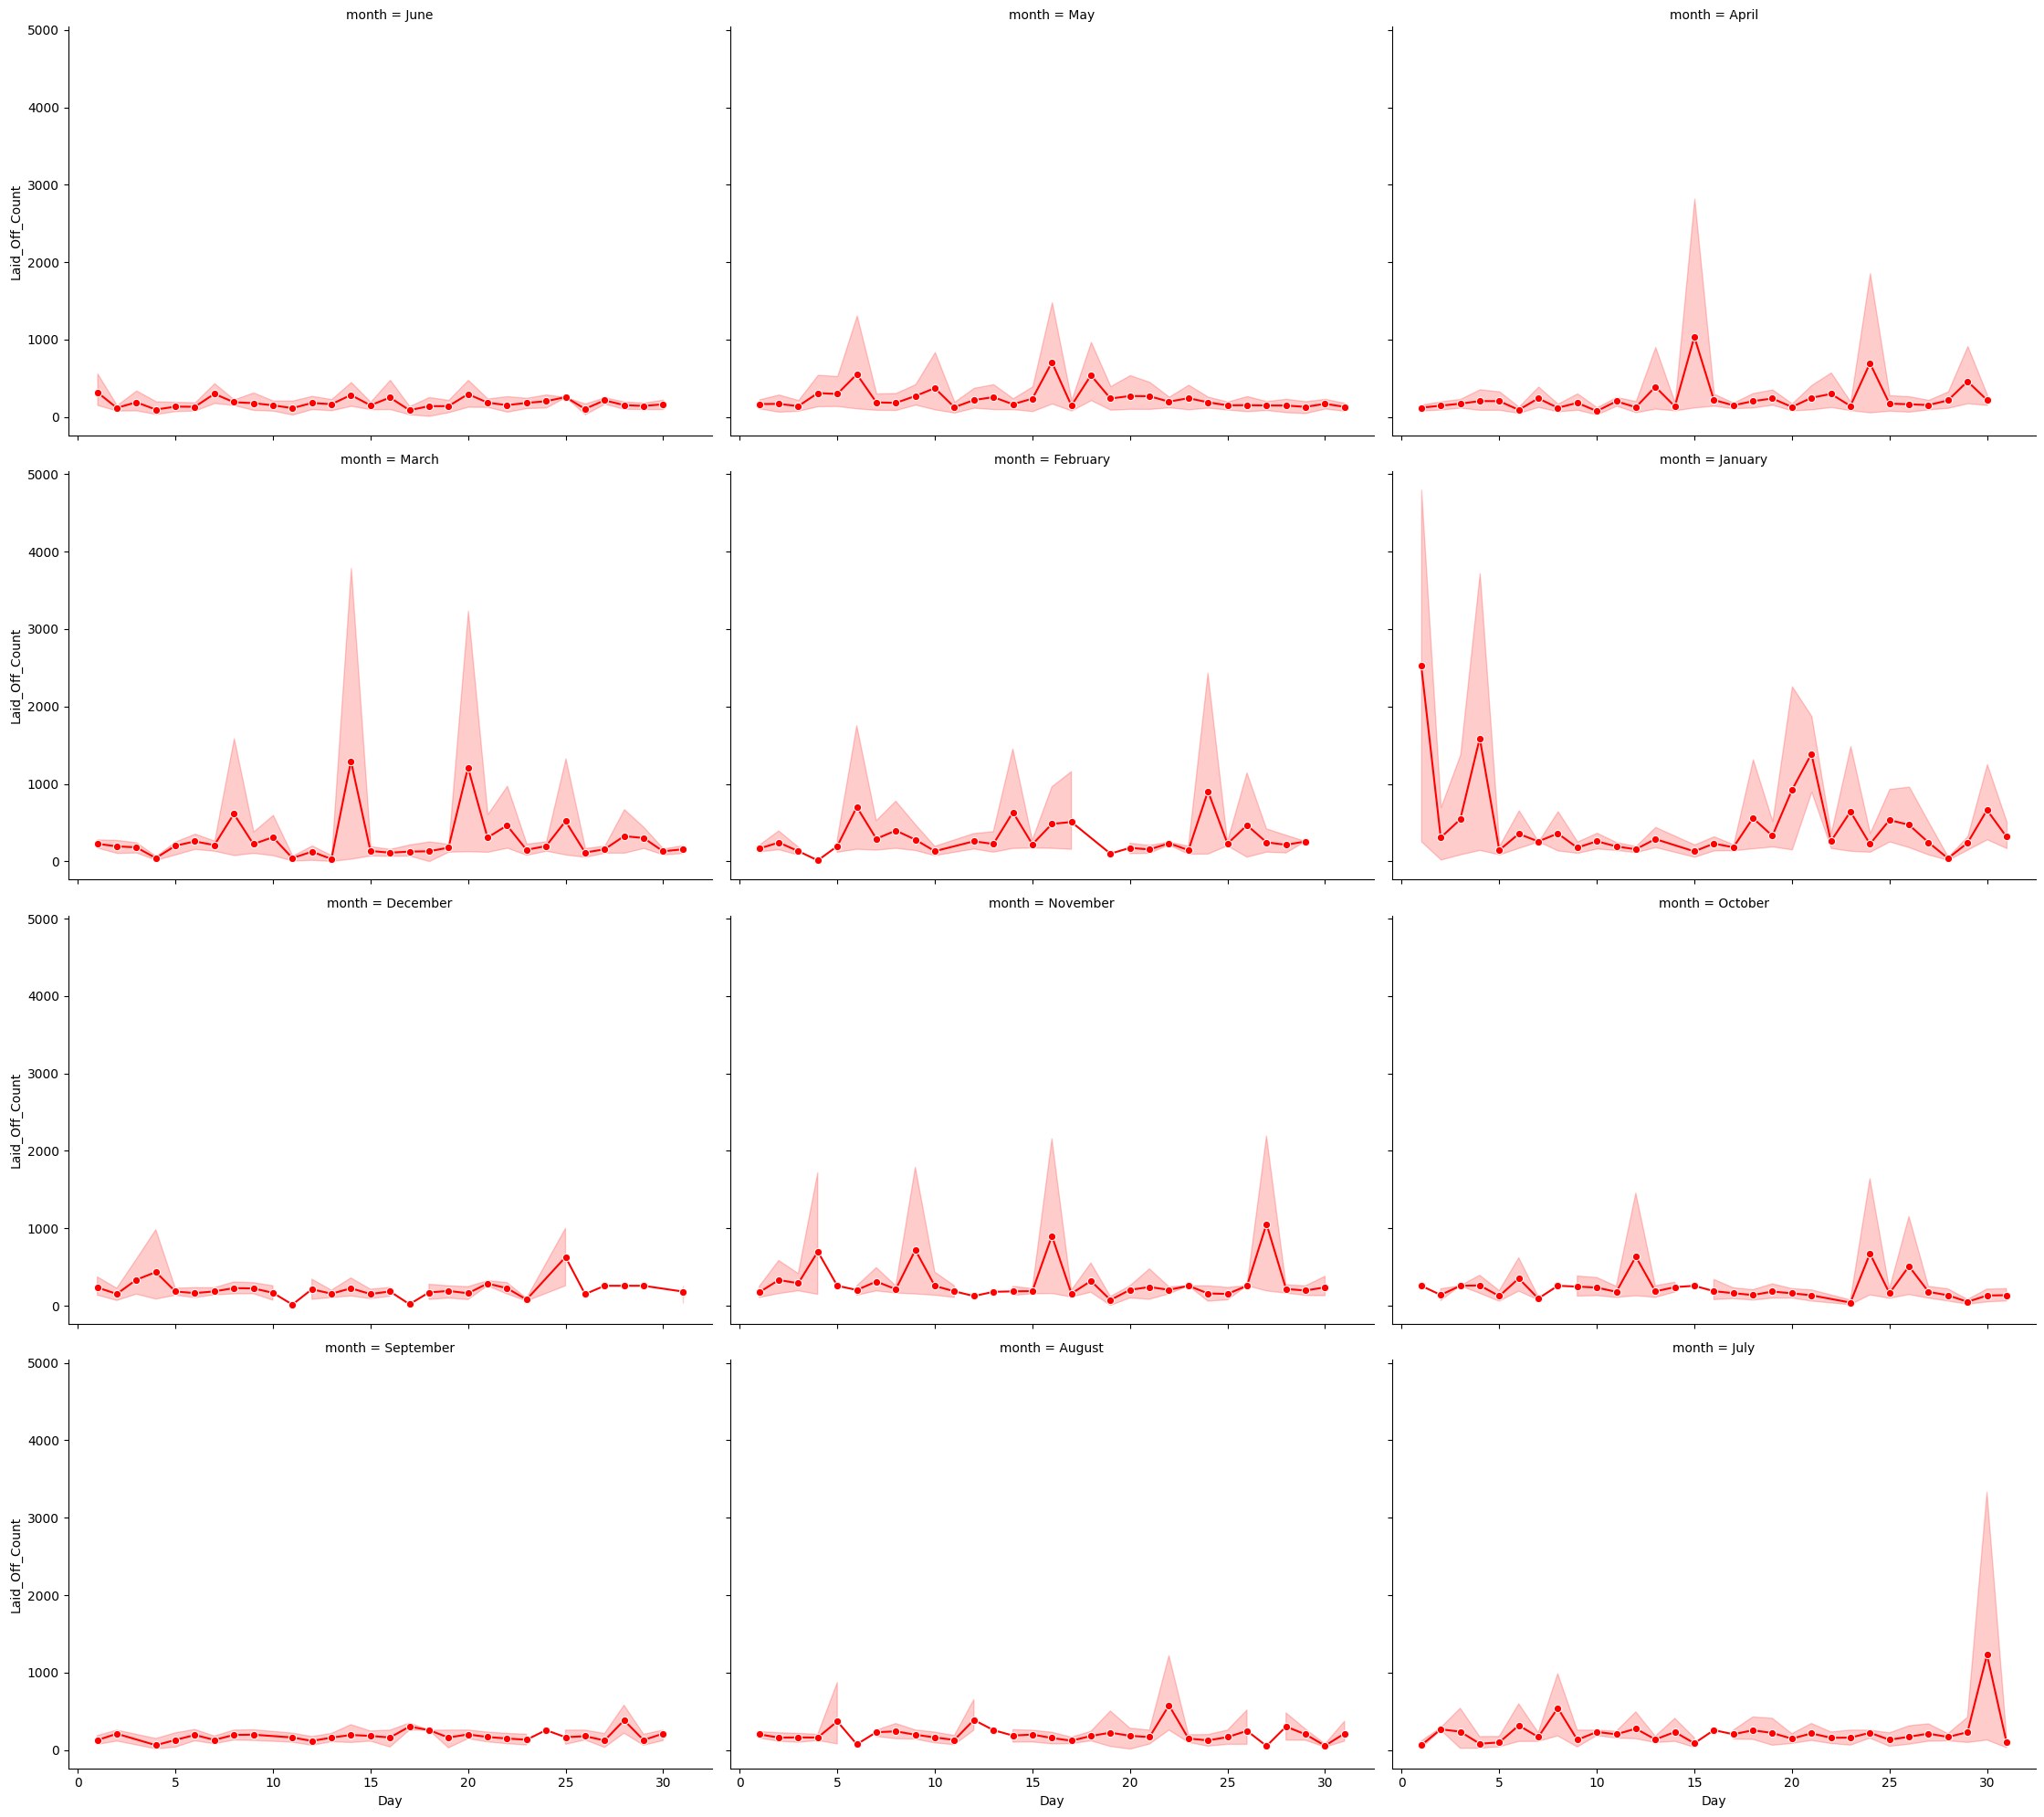

In [34]:
g = sns.FacetGrid(df, col="month", col_wrap=3, height=5, aspect=1.5)
g.map(sns.lineplot, "Day", "Laid_Off_Count", marker="o", color= "red")
plt.show()

Company Laid Off Count 

C:\Users\krupa\AppData\Local\Temp\ipykernel_22100\1237412956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Company", y="Laid_Off_Count", order=company, palette="plasma", data=df) # bar graph


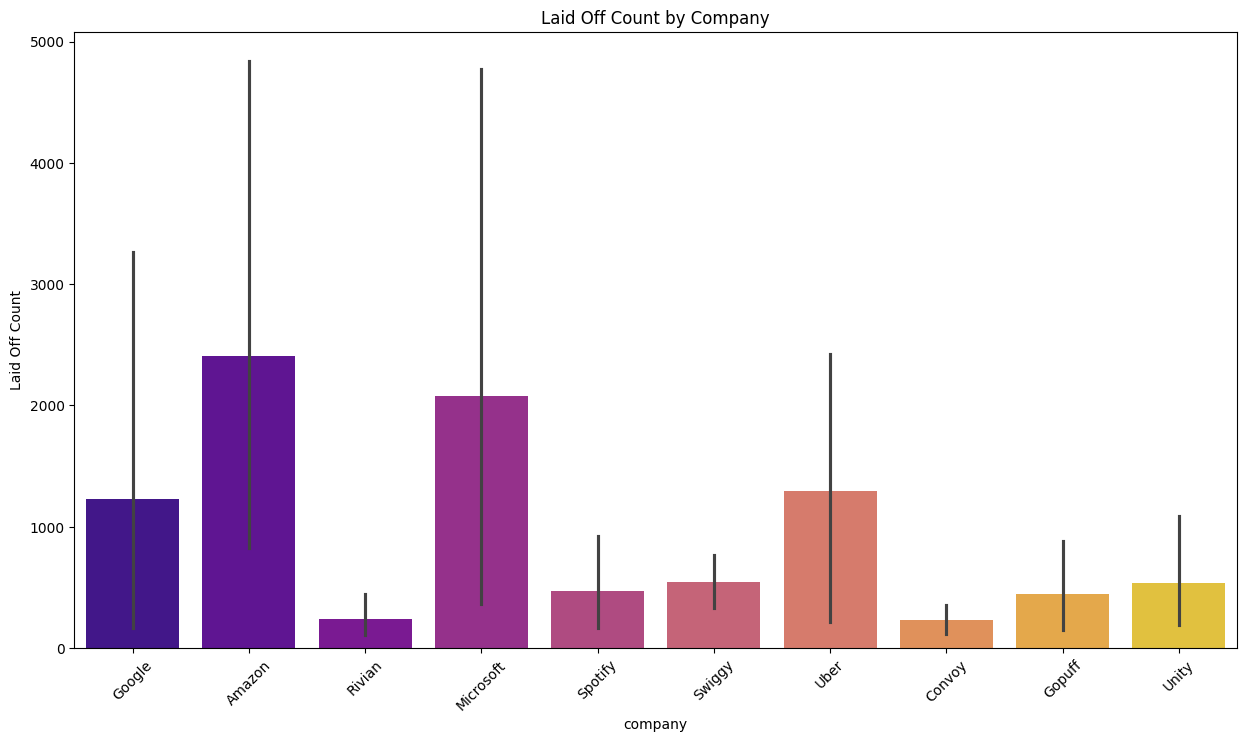

In [35]:
company = df['Company'].value_counts().head(10).index # top 10 company shows
plt.figure(figsize=(15, 8)) # size of graph 
sns.barplot(x="Company", y="Laid_Off_Count", order=company, palette="plasma", data=df) # bar graph
plt.xlabel('company') # label for x-axis
plt.ylabel('Laid Off Count') # label for y-axis
plt.title('Laid Off Count by Company') # title of graph 
plt.xticks(rotation=45) # rotate x-axis labels
plt.show() # display graph 

Country Laid Off Count

C:\Users\krupa\AppData\Local\Temp\ipykernel_22100\2796505579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="Laid_Off_Count", order=country, palette="magma", data=df) # plot barplot


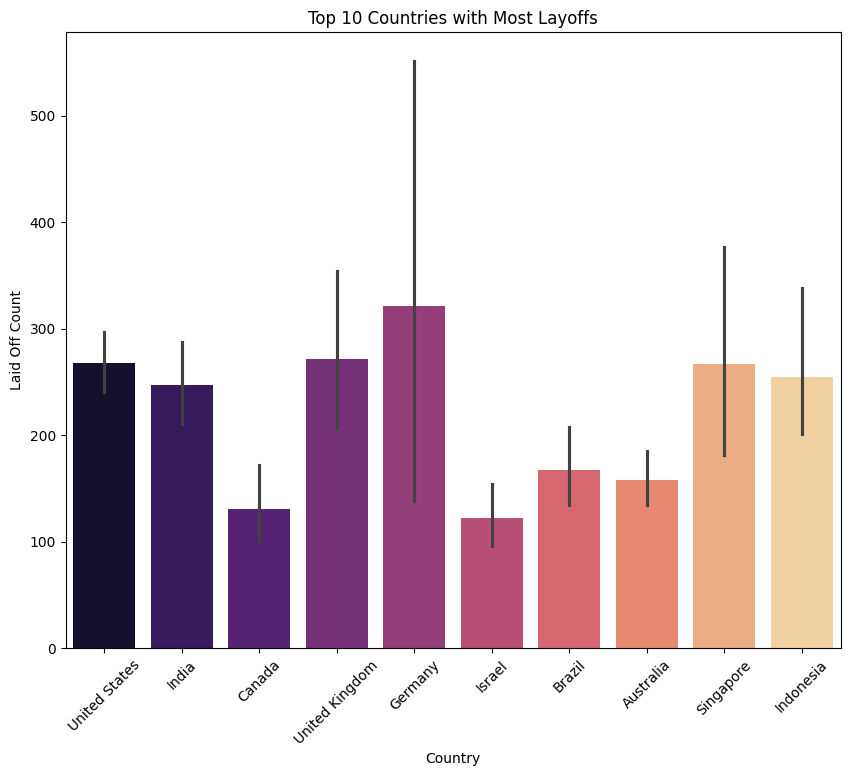

In [36]:
country = df['Country'].value_counts().head(10).index # top 10 country 
plt.figure(figsize=(10, 8)) # set figure size
sns.barplot(x="Country", y="Laid_Off_Count", order=country, palette="magma", data=df) # plot barplot
plt.xlabel("Country") # set x label
plt.ylabel("Laid Off Count") # set y label
plt.title("Top 10 Countries with Most Layoffs") # set title
plt.xticks(rotation=45)
plt.show()

C:\Users\krupa\AppData\Local\Temp\ipykernel_22100\4136217323.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x="Laid_Off_Count", y=cat, ax=ax[i], palette="Blues")
C:\Users\krupa\AppData\Local\Temp\ipykernel_22100\4136217323.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x="Laid_Off_Count", y=cat, ax=ax[i], palette="Blues")
C:\Users\krupa\AppData\Local\Temp\ipykernel_22100\4136217323.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, x="Laid_Off_Count", y=cat, ax=ax[i], palette="Blues")


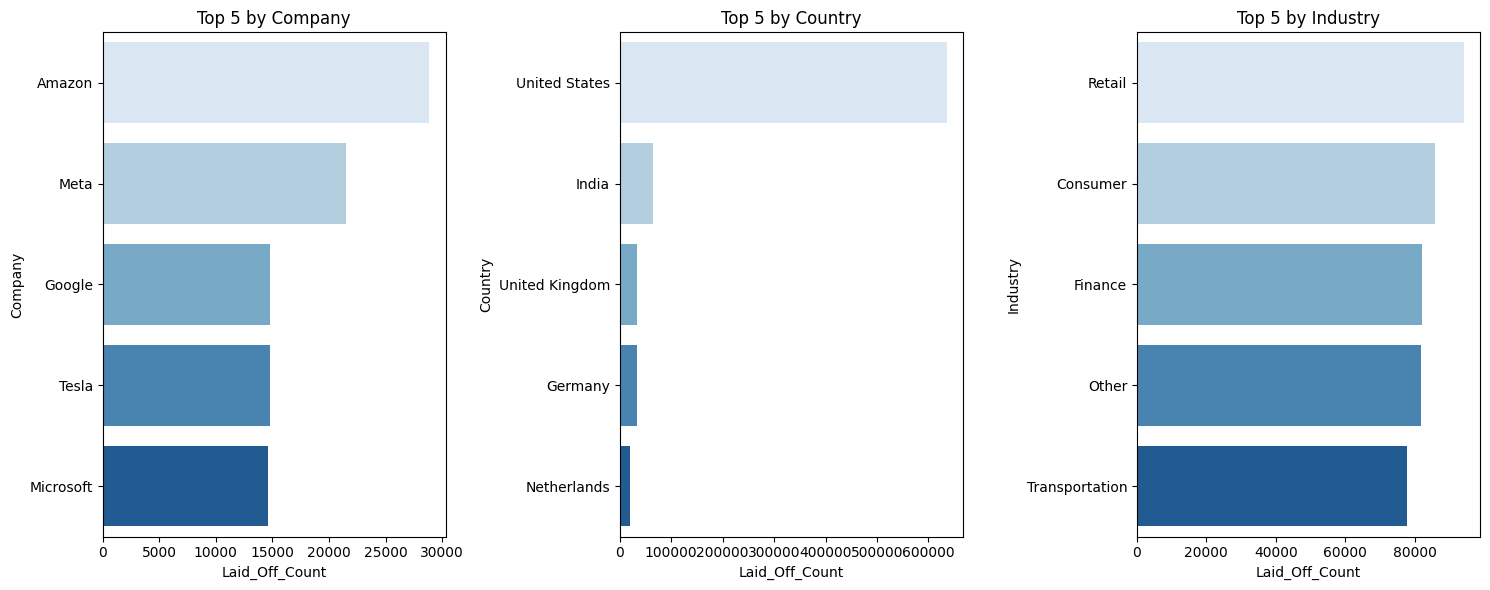

In [37]:
# Columns for grouping
a = ["Company", "Country", "Industry"]


fig, ax = plt.subplots(nrows=1, ncols=len(a), figsize=(15, 6)) # Creating subplots

# Loop through each category
for i, cat in enumerate(a):
    top = df.groupby(cat)['Laid_Off_Count'].sum().nlargest(5).reset_index() 
    sns.barplot(data=top, x="Laid_Off_Count", y=cat, ax=ax[i], palette="Blues")
    ax[i].set_title(f"Top 5 by {cat}")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [38]:
print(df.corr(numeric_only=True))

                Laid_Off_Count  Funds_Raised  Percentage       Day
Laid_Off_Count        1.000000      0.112286   -0.040644  0.012656
Funds_Raised          0.112286      1.000000   -0.046931  0.014008
Percentage           -0.040644     -0.046931    1.000000  0.002462
Day                   0.012656      0.014008    0.002462  1.000000


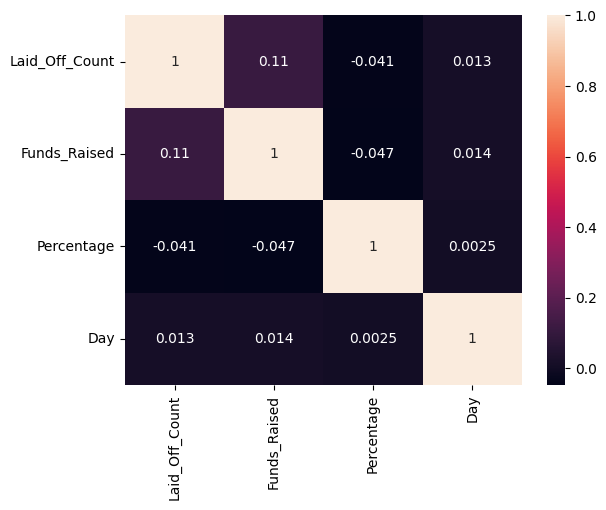

In [39]:
axis_corr = sns.heatmap(df.corr(numeric_only=True),annot=True) 
plt.show()

In [41]:
text = df['Industry'][0:]
text

0                 Food
1              Finance
2                 Food
3               Crypto
4            Marketing
             ...      
3637            Travel
3638    Transportation
3639          Consumer
3640            Retail
3641         Logistics
Name: Industry, Length: 3642, dtype: object

In [47]:
obj = WordCloud().generate(str(text))
obj

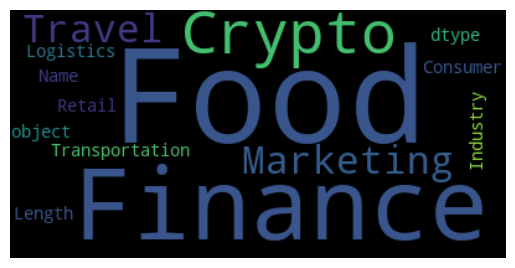

In [53]:
plt.imshow(obj, interpolation="bilinear")
plt.axis('Off')
plt.show()